<a href="https://colab.research.google.com/github/Alitariq747/heart_desease_log_reg/blob/main/Heart_Disease_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directory, Libraries and Data

In [17]:
# Directory
%cd /content/drive/MyDrive/Logistic Regression Project

/content/drive/MyDrive/Logistic Regression Project


In [18]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [19]:
# Data
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Data Analysis and Data Preparation


In [21]:
#First we must drop the education variable
df = df.drop(columns = ['education'])
df.head(0)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


<Axes: >

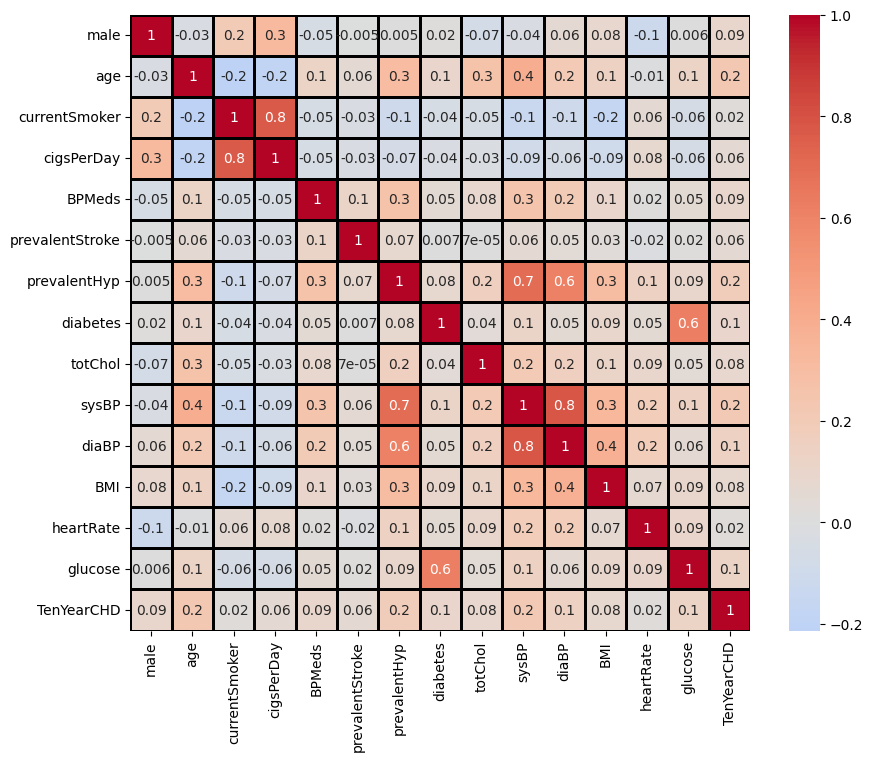

In [22]:
#Now we check for correlation to asses how vars add value and are related.

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), fmt = '.1g', annot = True, cmap = 'coolwarm', linewidths = 2, linecolor = 'black', center = 0)

As we see some variables have very high correlation so lets remove one or two variables to avoid mutlicollinearity. Since sysBP has high correlation with TenYearCHD than diaBP we can remove sysBP. diabetes and glucose also have very high correlation so we can remove one of them -> lets remove glucose. In addition both sysBP and diaBP have high correlation with prevelantHYP so we can remove both sysBP and diaBP.

In [23]:
# Drop variables with very high corr
df = df.drop(columns = ['sysBP', 'diaBP', 'glucose'])
df.head(0)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD


<Axes: >

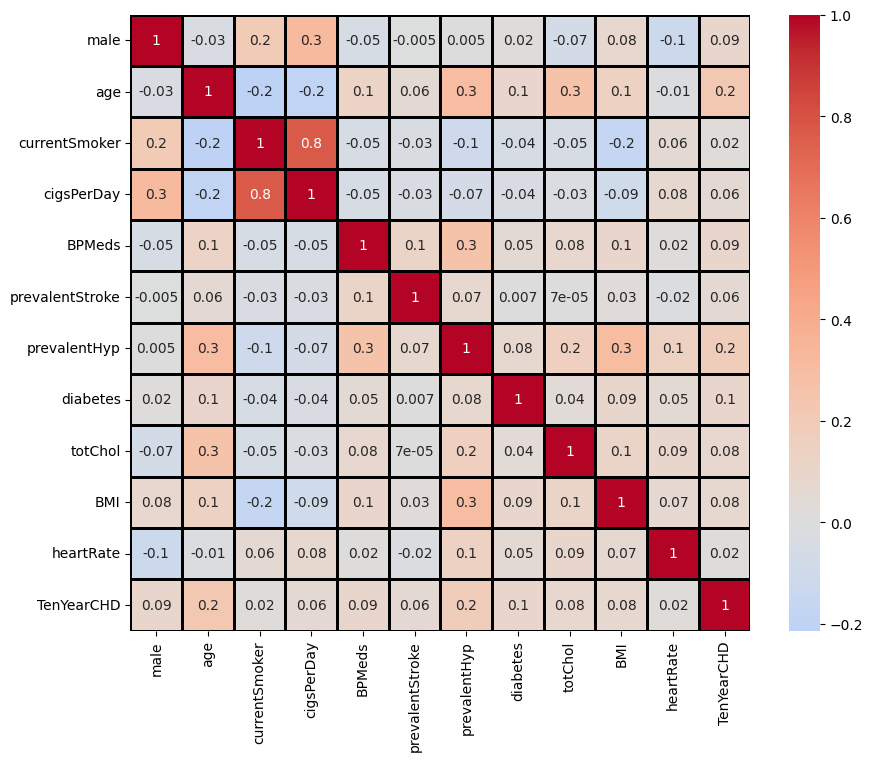

In [24]:
# Now lets look at the correlation matrix again
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), fmt = '.1g', annot = True, cmap = 'coolwarm', linewidths = 2, linecolor = 'black', center = 0)

Now it looks better.

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>],
       [<Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

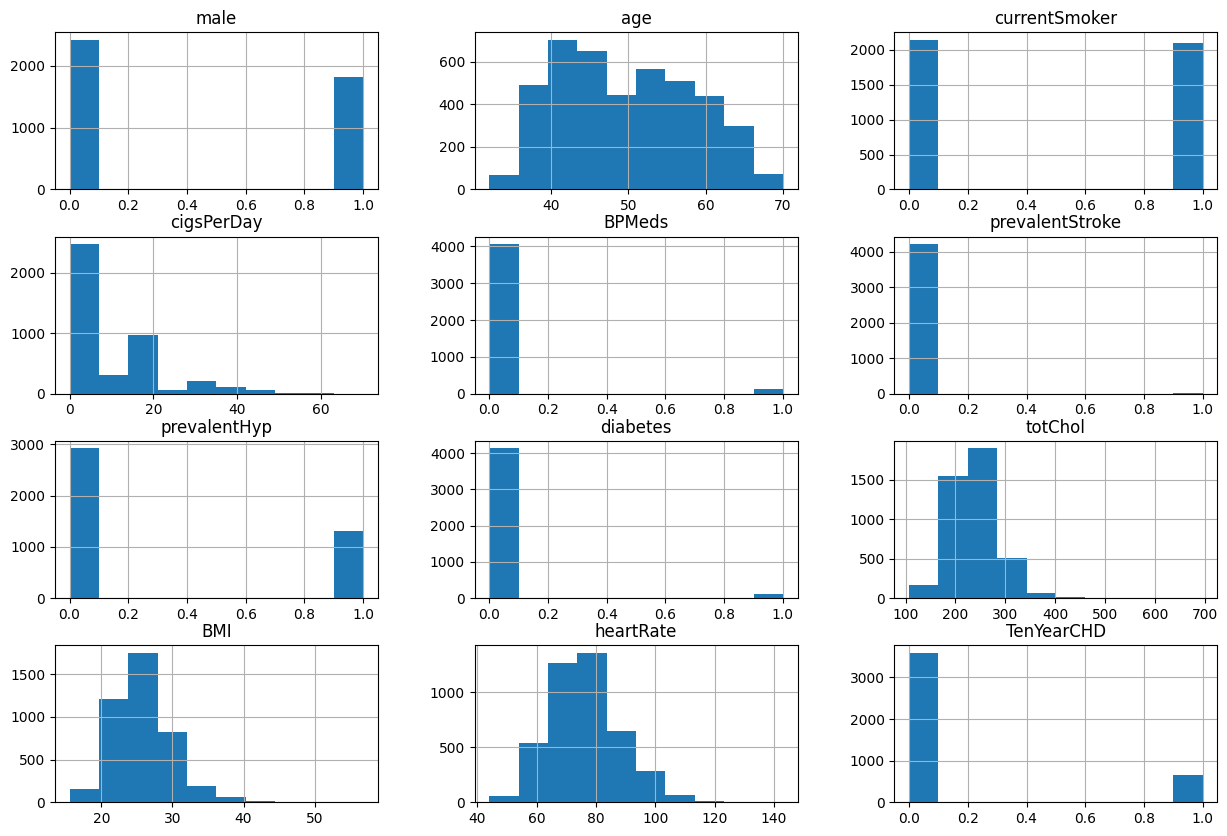

In [25]:
#Lets check with histograms our variabe distributions

df.hist(figsize=(15, 10))

We see some outliers in BMI heartrate totChol and cigsPerDay; so lets remove them to increase robustness of our model.

In [26]:
#Remove outliers
print(len(df))
df = df[df['cigsPerDay'] < 50]
df = df[df['totChol'] < 400]
df = df[df['BMI'] < 40]
df = df[df['heartRate'] < 120]

4238


In [27]:
print(len(df))

4072


In [28]:
#Lets check for missing values.
df.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
BMI                 0
heartRate           0
TenYearCHD          0
dtype: int64

In [29]:
df['BPMeds'].fillna(value = 0, inplace = True)

In [30]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

# Logistic Regression

In [31]:
#Prepare X and y
y = df['TenYearCHD']
X = df.drop(columns = ['TenYearCHD'])
X.head(0)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate


In [32]:
#Add constant to X
X = sm.add_constant(X)

In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1502)

In [35]:
#Run the regression:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.370323
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3257
Model:                          Logit   Df Residuals:                     3245
Method:                           MLE   Df Model:                           11
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.1109
Time:                        09:50:34   Log-Likelihood:                -1206.1
converged:                       True   LL-Null:                       -1356.6
Covariance Type:            nonrobust   LLR p-value:                 5.798e-58
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.4581      0.678    -11.003      0.000      -8.787      -6.130
male          

As we see some of vars are significant statistically like male, age, cigsPerDay, prevelant Hyp and diabetes and all seems to increase the likelihood of chronic heart desease. Other variables seem to be statistically insignificant.

In [38]:
#lets now compute the probabilities of each coefficient:
print(f'The odds of a unit increase in age increases the chances of heart illness by {round((np.exp(0.0755)-1) * 100, 2)} percent')

The odds of a unit increase in age increases the chances of heart illness by 7.84 percent


In [52]:
print(f'The odds of a unit increase in cigs consumption per day increases the chances of heart illness by {round((np.exp(0.0296)-1) * 100, 2)} percent')

The odds of a unit increase in cigs consumption per day increases the chances of heart illness by 3.0 percent


In [53]:
print(f'The odds of a unit increase in Hypertension increases the chances of heart illness by {round((np.exp(0.6421)-1) * 100, 2)} percent')

The odds of a unit increase in Hypertension increases the chances of heart illness by 90.05 percent


In [54]:
print(f'The odds of a unit increase in diabetes increases the chances of heart illness by {round((np.exp(0.6736)-1) * 100, 2)} percent')

The odds of a unit increase in diabetes increases the chances of heart illness by 96.13 percent


In [55]:
print(f'The odds of being a male increases the chances of heart illness by {round((np.exp(0.4261)-1) * 100, 2)} percent')

The odds of being a male increases the chances of heart illness by 53.13 percent


From our model we can see that hypertension and diabetes are most likely to increase the likelihood of heart desease.

#Predictions and assessments

In [44]:
#Predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.4, 1, 0)
print(predictions[:5])
print(y_test[:5])

[0 0 0 0 0]
3543    0
2560    0
3317    0
1405    0
3375    0
Name: TenYearCHD, dtype: int64


In [45]:
#Accuracy
#Check if data set in balanced
y_test.mean()

0.15828220858895706

Since the data set doesnot seem to be balanced we can rely on accuracy as our KPI.

In [46]:
#First lets get the confusion matrix.
#Confusion matrix:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
confusion_matrix(y_test, predictions)

array([[662,  24],
       [113,  16]])

In [49]:
#Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8319018404907975


In [47]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       686
           1       0.40      0.12      0.19       129

    accuracy                           0.83       815
   macro avg       0.63      0.54      0.55       815
weighted avg       0.78      0.83      0.79       815



In [51]:
df['TenYearCHD'].value_counts()

0    3466
1     606
Name: TenYearCHD, dtype: int64

Based on the above analysis we can say that model was good in predicting the negative class where people had no heart illness but it was not very accurate in terms of precision i.e predicting heart illness. This could be due to the fact that we had a very imbalanced data set; where people with no heart illness were considerably higher (6 times more) than poeple with heart illness.